<h1>What are the lyrical differences between pop, rock and hip-hop songs? </h1>
<ul> 
    <li>
        <p>
            What are the common themes in each genre, are they shared or do they differentiate from genre to genre
        </p>
    </li>
        <li>
        <p>
            Do certain genres contain more mature language than the others?
        </p>
    </li>
</ul>


In [27]:
import pandas

In [28]:
lyrics = pandas.read_csv('lyrics-data.csv')
english_songs = lyrics['Idiom'] =='ENGLISH' 


In [29]:
english = lyrics[english_songs]

In [30]:
artist = pandas.read_csv('artists-data.csv')
print(artist.shape)
pop = artist['Genre'] == 'Pop'

popsongs = artist[pop]

english_popsongs = pandas.merge(popsongs, english, left_on='Link', right_on='ALink')
english_popsongs.to_csv('englishPopSongs.csv', index=False)

(3242, 6)


In [31]:

# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [32]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub("[‘’“”…]", "", text)
    text = re.sub("\n", "", text)
    text = text.replace("'", "")
    text = text.replace('\u2026', '')
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
    text = re.sub("[\.][\.][\.]", "", text)
    return text

round2 = lambda x: clean_text_round2(x)

In [33]:
# Apply a third round of cleaning
def clean_text_round3(text):
    '''Get rid of â€™Ă©Ł§ˇŞ '''
    text = re.sub('[^A-Za-z0-9 ]+', '',text)
    text = re.sub("[\.][\.][\.]", "", text)
    text = text.replace('...', '')
    
    return text

round3 = lambda x: clean_text_round3(x)

In [34]:
from collections import Counter 
# REMOVE DUPLICATES WORDS  
def clean_text_round4(input): 
  
    # split input string separated by space 
    input = input.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    s = " ".join(UniqW.keys()) 
    return s
round4 = lambda x: clean_text_round4(x)

In [35]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# remove stop words
def clean_text_round5(text):
    stop_words = set(stopwords.words("english"))
    stop_words.update(['im','know','like','dont','got','na','cant','oh','let','youre','get','yeah','ive','right','s','theres','ta','put','gon','ill','come','youve','weve', 'first'])
    words = word_tokenize(text)
    cleanedText = '';
    for word in words:
        if word not in stop_words:
            cleanedText += '{} '.format(word)
    return cleanedText
round5 = lambda x: clean_text_round5(x)

In [36]:
from collections import Counter
import nltk

def common_words(arr):
    text = ' '.join(map(str, arr))
    nltk_tokens = nltk.word_tokenize(text)
    # Pass the split_it list to instance of Counter class. 
    _Counter = Counter(nltk_tokens) 
  
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    most_occur = _Counter.most_common(100)
    return most_occur

In [37]:
from nltk.stem import 	WordNetLemmatizer
import nltk
def remove_dots(arr):
    wordnet_lemmatizer = WordNetLemmatizer()
    text = arr.to_string()
    nltk_tokens = nltk.word_tokenize(text)
    stop = ['...', 't','s', 'w', 'b', 'ya', 'yo','ye','lo','side','st','wa','thats', 'wont', 'hold', 'wan', 'make', 'every', 'whats', 'id', 'cause', 'ever', 'thing', 'could', 'would', 'aint','going','lets','whats', 'didnt','way', 'verse', 'choru', 'uh', 'co', 'chorus']
    text_arr = []
    for token in nltk_tokens:
        if token not in stop:
            wordnet_lemmatizer.lemmatize(token)
            text_arr.append(token)
    return text_arr


In [38]:
pop_data_clean_round1 = pandas.DataFrame(english_popsongs['Lyric'].apply(clean_text_round1))

In [39]:
pop_data_clean_round2 = pandas.DataFrame(pop_data_clean_round1['Lyric'].apply(clean_text_round2))

In [40]:
pop_data_clean_round3 = pandas.DataFrame(pop_data_clean_round2['Lyric'].apply(clean_text_round3))

In [41]:
pop_data_clean_round4 = pandas.DataFrame(pop_data_clean_round3['Lyric'].apply(clean_text_round4))

In [42]:
pop_data_clean_round5 = pandas.DataFrame(pop_data_clean_round4['Lyric'].apply(clean_text_round5))

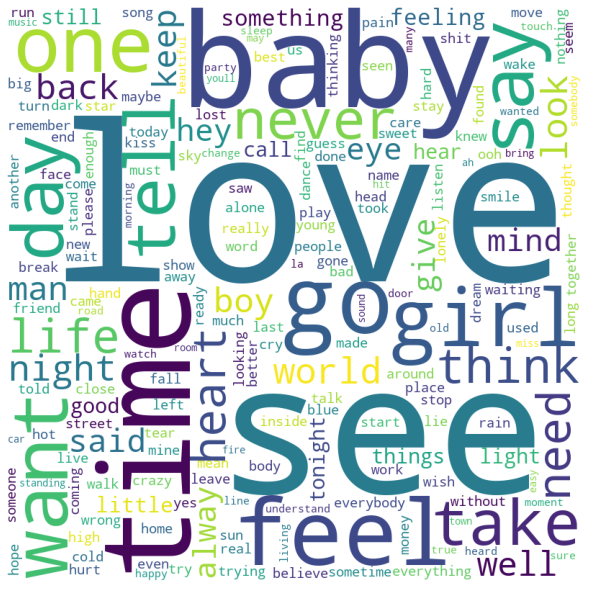

In [43]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

r = remove_dots(pop_data_clean_round5['Lyric'])
w = common_words(r)

text = ' '.join(r)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()